**Fundamental Machine Learning Submission**

Name: Ibrahimsyah Zairussalam

Email: ibra.himsyah10@gmail.com

In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
   -O /tmp/rockpaperscissors.zip

--2021-06-28 16:31:13--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.66MB/s    in 58s     

2021-06-28 16:32:12 (5.27 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BASE_DIR = "/tmp/rockpaperscissors/rps-cv-images"
datagen = ImageDataGenerator(
                    validation_split=0.4,
                    rescale=1./255,
                    rotation_range=20,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
train_generator = datagen.flow_from_directory(
    BASE_DIR, 
    subset='training',
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical'
)
val_generator = datagen.flow_from_directory(
    BASE_DIR, 
    subset='validation',
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [4]:
from keras import callbacks

model = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
     tf.keras.layers.MaxPooling2D(2, 2),
     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dense(3, activation='softmax')
 ])
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

class CustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):
      self.model.stop_training = True

earlyStopCb = CustomCallback()
result = model.fit(
       train_generator,
       steps_per_epoch=20,
       epochs=50,
       validation_data=val_generator,
       validation_steps=5,
       verbose=1,
       callbacks=[earlyStopCb]
       )

Epoch 1/50
20/20 [==============================] - 6s 287ms/step - loss: 1.1137 - accuracy: 0.2949 - val_loss: 1.0916 - val_accuracy: 0.5000
Epoch 2/50
20/20 [==============================] - 6s 277ms/step - loss: 1.0257 - accuracy: 0.5125 - val_loss: 0.7412 - val_accuracy: 0.8500
Epoch 3/50
20/20 [==============================] - 6s 279ms/step - loss: 0.7019 - accuracy: 0.7500 - val_loss: 0.4635 - val_accuracy: 0.8500
Epoch 4/50
20/20 [==============================] - 6s 274ms/step - loss: 0.6073 - accuracy: 0.7564 - val_loss: 0.3125 - val_accuracy: 0.9000
Epoch 5/50
20/20 [==============================] - 6s 275ms/step - loss: 0.4641 - accuracy: 0.8250 - val_loss: 0.4165 - val_accuracy: 0.8000
Epoch 6/50
20/20 [==============================] - 6s 280ms/step - loss: 0.3049 - accuracy: 0.9000 - val_loss: 0.6300 - val_accuracy: 0.9000
Epoch 7/50
20/20 [==============================] - 6s 283ms/step - loss: 0.3388 - accuracy: 0.9250 - val_loss: 0.1918 - val_accuracy: 0.9500
Epoch 

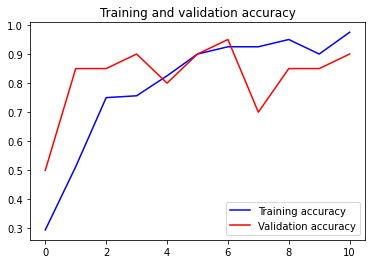

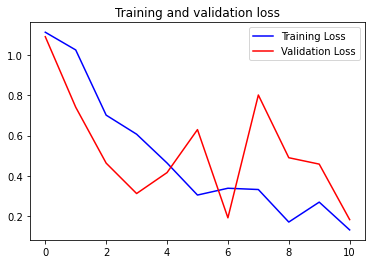

In [5]:
import matplotlib.pyplot as plt
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Saving 1L1n6plr7jlZGirw.png to 1L1n6plr7jlZGirw.png
1L1n6plr7jlZGirw.png
scissor


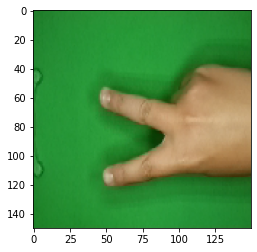

In [9]:
from google.colab import files
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
     
for fn in uploaded.keys():
     
   # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
     
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
      
  print(fn)
  if classes[0][0] == 1:
    print('paper')
  elif classes[0][1] == 1:
    print('rock')
  else:
    print('scissor')